In [1]:
import xarray as xr
from statsmodels.tsa import tsatools
import numpy as np
import sys
sys.path.append('/home/563/rl5183/PhD-research/Functions')
import functions as func

In [2]:
# Open HadISST 
sst_ds = xr.open_dataset('/g/data/w40/rl5183/hadisst.1870_2017_1.5x1.5.nc')
sst = sst_ds.sst.sel(lat=slice(-30,30)).sel(lon=slice(120,270)).sel(time=slice('1900-01', '2014-12'))

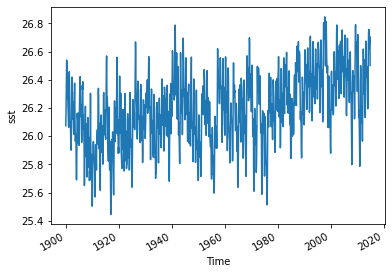

In [3]:
sst_1d = sst.mean(dim=['lat', 'lon'])
sst_1d.plot()

In [4]:
test = tsatools.detrend(sst_1d, order=2)

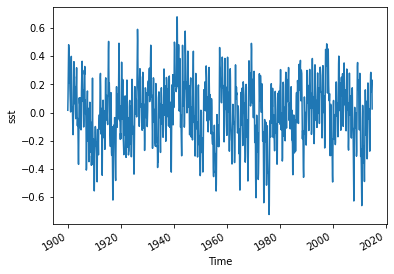

In [5]:
test.plot()

In [6]:
def quad_detrend(data):
    return tsatools.detrend(data, order=2)

In [7]:
sst_detrend = np.apply_along_axis(quad_detrend, 0, sst)

In [8]:
sst_dt = xr.DataArray(sst_detrend, coords=sst.coords, attrs=sst.attrs)

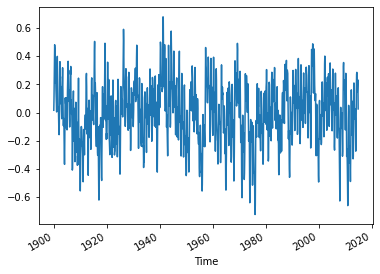

In [9]:
sst_dt.mean(dim=['lat', 'lon']).plot()

In [10]:
# Compare with linear detrend
lin_detrend = np.apply_along_axis(func.detrend_2step, 0, sst)
lin_dt = xr.DataArray(lin_detrend, coords=sst.coords, attrs=sst.attrs)

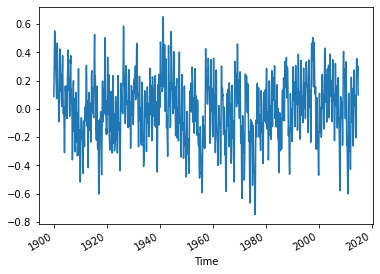

In [11]:
lin_dt.mean(dim=['lat', 'lon']).plot()

In [13]:
from scipy.stats import pearsonr
pearsonr(sst_dt.mean(dim=['lat', 'lon']), lin_dt.mean(dim=['lat', 'lon']))

(0.9891685112075869, 0.0)

### Apply EOF to linearly detrended data and quadtratically detrended data 

In [14]:
clim_q = sst_dt.sel(time=slice('1979-01', '2008-12')).groupby('time.month').mean()
anom_q = sst_dt.groupby('time.month') - clim_q

In [15]:
clim_l = lin_dt.sel(time=slice('1979-01', '2008-12')).groupby('time.month').mean()
anom_l = lin_dt.groupby('time.month') - clim_l

In [16]:
eof_q, pcs_q, var_q = func.eof_and_pcs(anom_q, 2)
eof_l, pcs_l, var_l = func.eof_and_pcs(anom_l, 2)

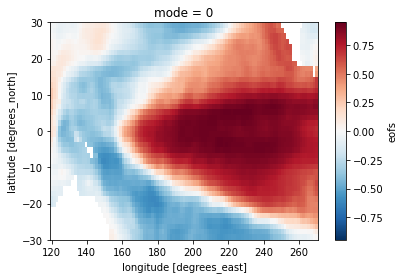

In [21]:
(eof_q.sel(mode=0)*(-1)).plot()

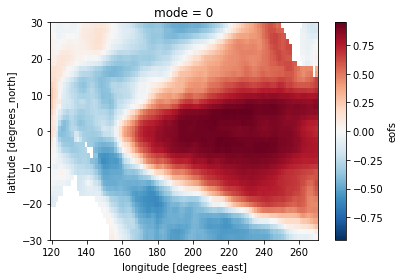

In [22]:
(eof_l.sel(mode=0)*(-1)).plot()

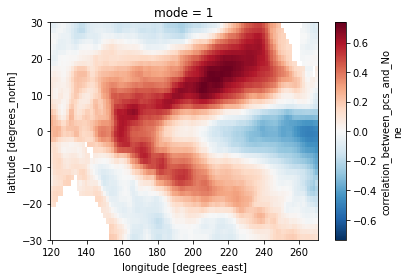

In [24]:
eof_q.sel(mode=1).plot()

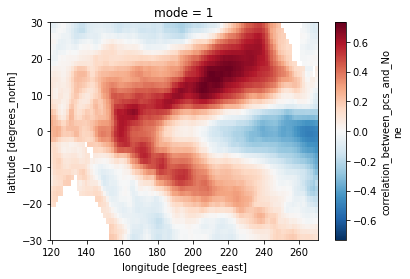

In [25]:
eof_l.sel(mode=1).plot()

In [38]:
# Pattern correlation
func.pattern_cor(eof_q.sel(mode=0), eof_l.sel(mode=0))

(0.9996507906469427, 0.0)

In [39]:
func.pattern_cor(eof_q.sel(mode=1), eof_l.sel(mode=1))

(0.9996661969111287, 0.0)

Pattern correlation indicates very strong similarity between the EOFs after the two different methods of detrending.
Hence, conclude that choice of detrending will not majorly influence results. 